In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import sqlite3
from sgtaxidata import *

In [2]:
DBNAME="../taxis.db"
LAT=1.380766
LON=103.891675
LAT1=1.303693
LON1=103.844952
x,y = utils.get_grid_cell(LAT,LON,20)
x1,y1 = utils.get_grid_cell(LAT1,LON1,20)
print x,y
print x1,y1


24 12
20 5


In [3]:
data=taxis.fetch_grid_by_date(DBNAME,"20170627")

In [4]:
df = pd.DataFrame(data)
df.columns=['time','x','y','taxicount']

In [5]:
df.head()


,time,x,y,taxicount
0,0000,0,0,0
1,0000,1,0,0
2,0000,2,0,0
3,0000,3,0,0
4,0000,4,0,0


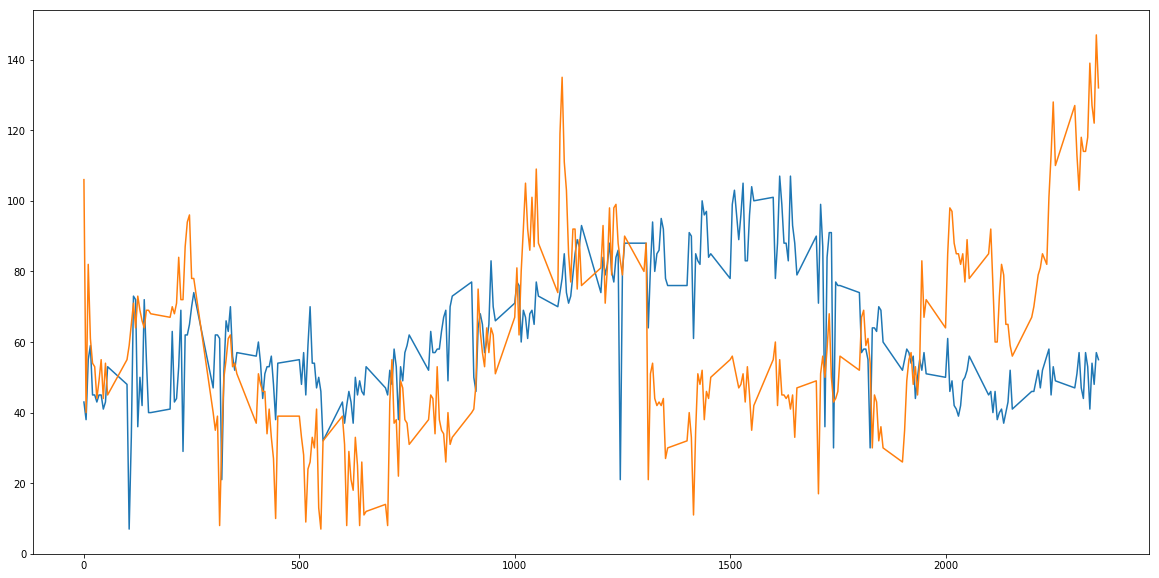

In [25]:
d1=df.query('x==20 and y==12')
x=d1['time'].tolist()
y=d1['taxicount'].tolist()
d2=df.query('x==20 and y==5')
x1=d2['time'].tolist()
y1=d2['taxicount'].tolist()
visualize.plot_data([(x,y),(x1,y1)])




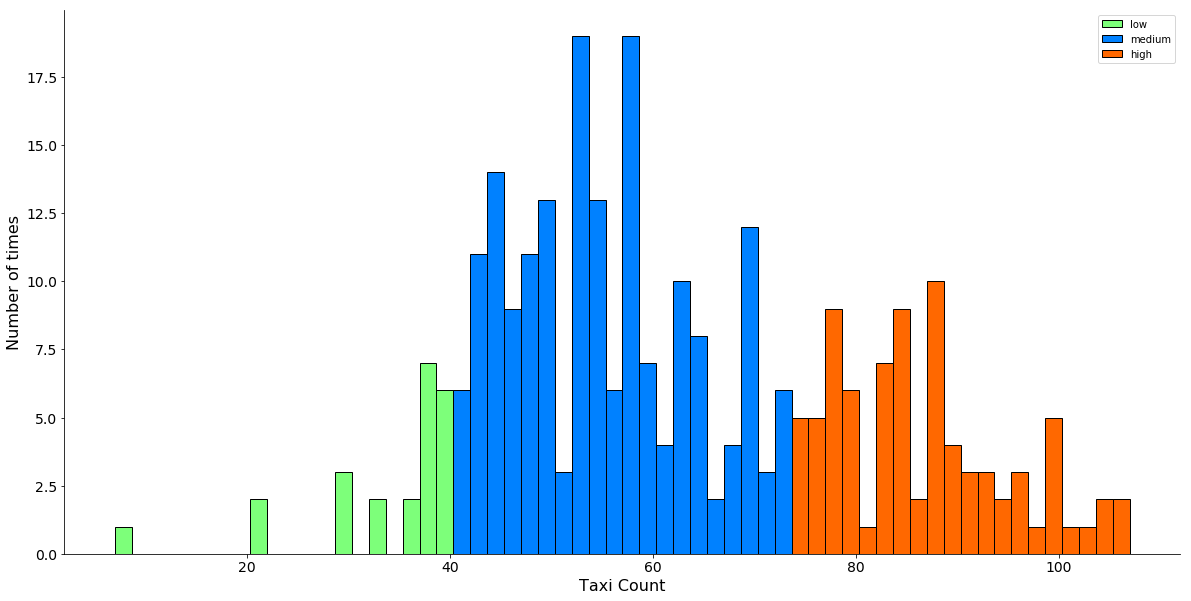

In [33]:
visualize.plot_hist(y,'Taxi Count','Number of times')

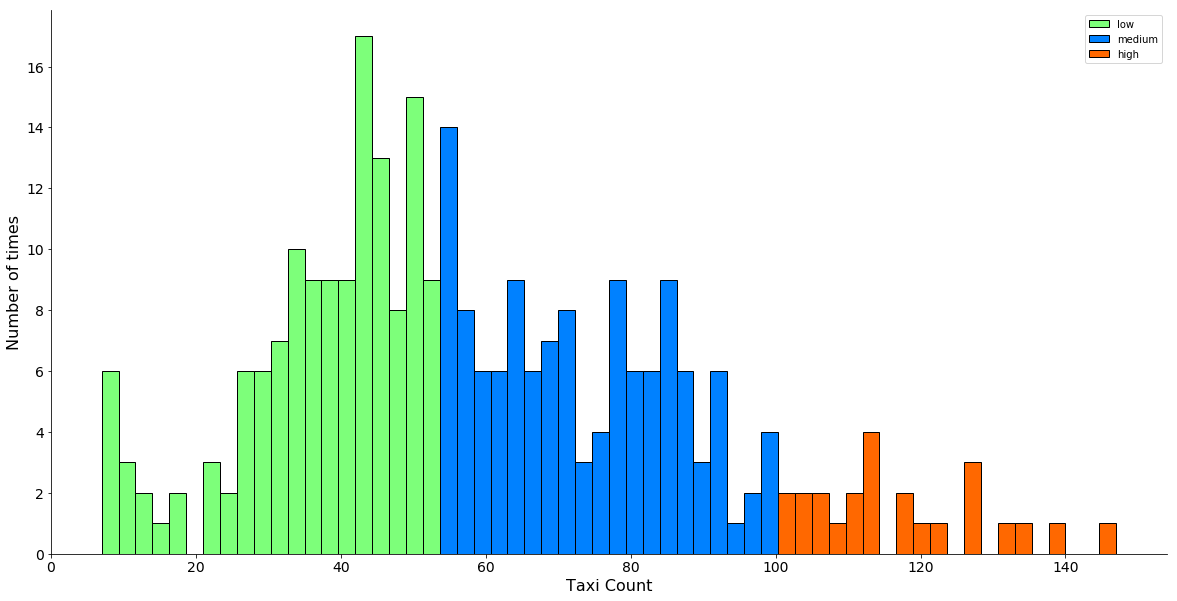

In [34]:
visualize.plot_hist(y1,'Taxi Count','Number of times')

280


/Users/hari/python/py2/taxidata/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


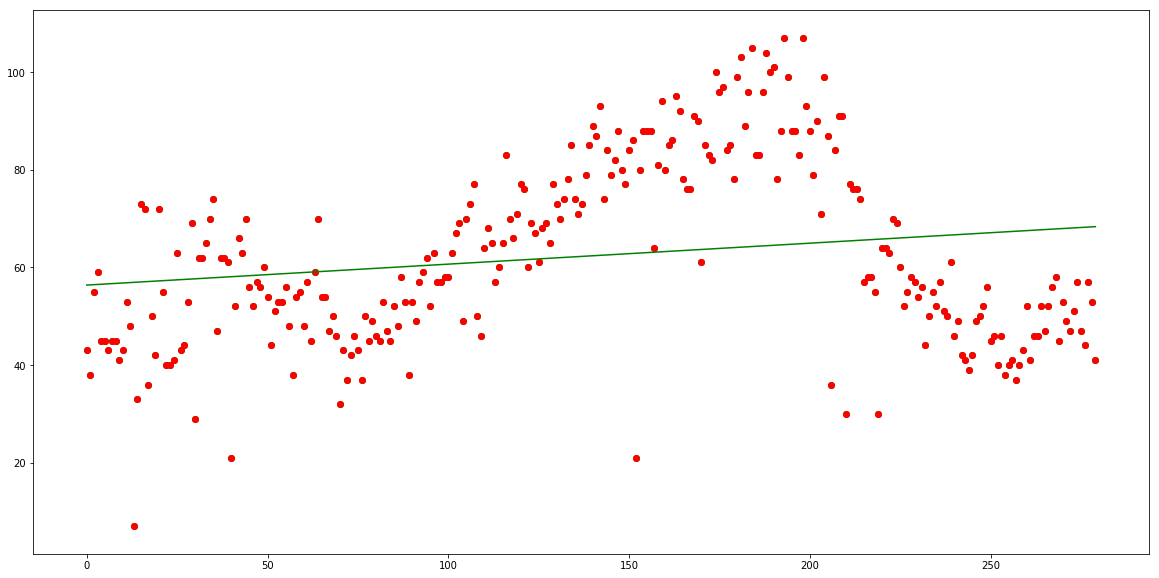

In [8]:
from sklearn.linear_model import LinearRegression

X = np.array(range(280))
y = (df.query('x==20 and y==12').head(280)['taxicount']).as_matrix()

print len(y)

X=X.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

X_predict=np.array([281,282]).reshape(-1,1)

visualize.plot_model(X,y,model)


In [9]:
by_hour = taxis.fetch_loc_by_time(DBNAME,"0905",LAT,LON)
df_hour = pd.DataFrame(by_hour)
df_hour.columns=['Date','X','Y','TaxiCount']
df_hour['Date']=pd.to_datetime(df_hour['Date'])
df_hour

,Date,X,Y,TaxiCount
0,2017-06-24,24,12,37
1,2017-06-25,24,12,32
2,2017-06-26,24,12,57
3,2017-06-27,24,12,17
4,2017-06-28,24,12,17
5,2017-06-29,24,12,16
6,2017-06-30,24,12,12
7,2017-07-01,24,12,32
8,2017-07-02,24,12,28
9,2017-07-03,24,12,13


[0 1 2 3]


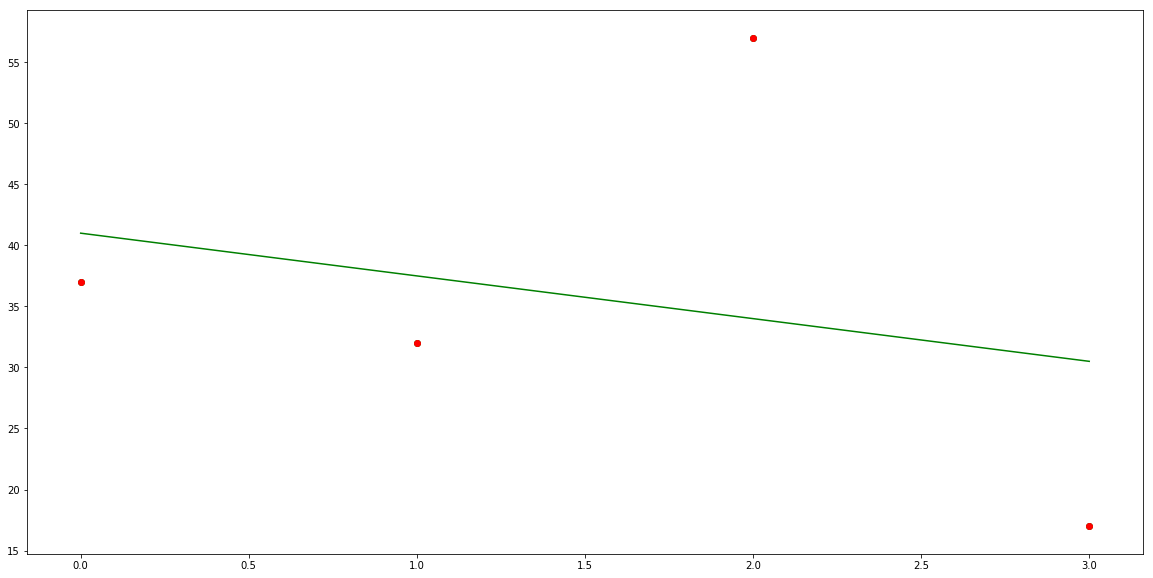

In [10]:
import datetime
X = np.array(range(4))
y = (df_hour.head(4)['TaxiCount']).as_matrix()

print X

X=X.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

X_predict=np.array([2]).reshape(-1,1)



visualize.plot_model(X,y,model)

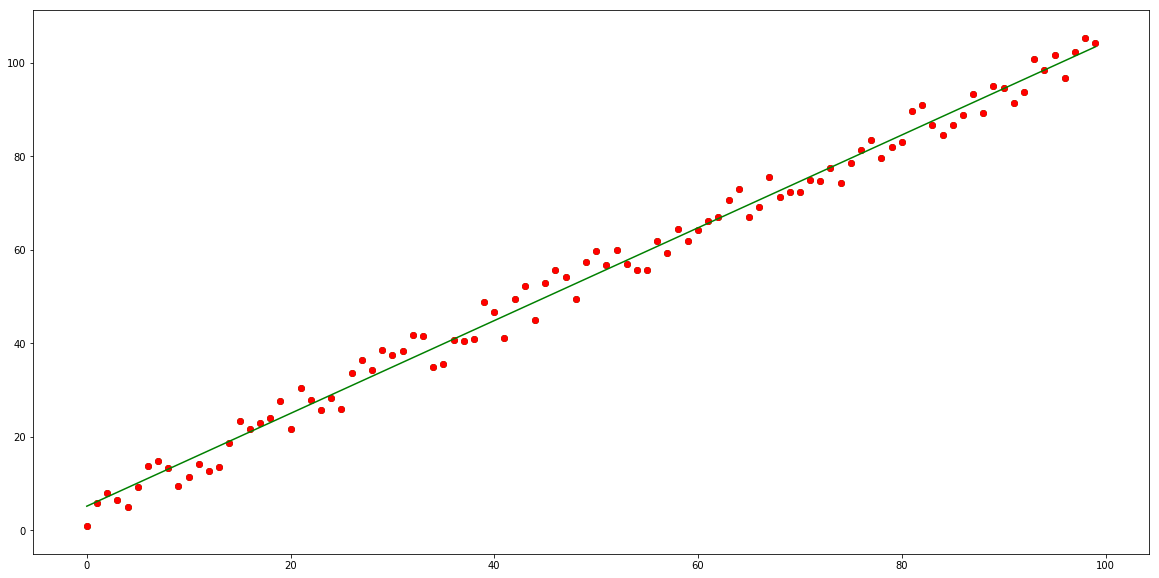

In [11]:
import random
X = np.array(range(100))
y = np.array([x+random.random()*10 for x in range(100)])


X=X.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

X_predict=np.array([50,101]).reshape(-1,1)


visualize.plot_model(X,y,model)